In [2]:
import torch
from torch import nn
from d2l import torch as d2l
import math

In [3]:
def train_2d(trainer, steps=20, f_grad=None): #@save
    x1, x2, s1, s2 = -5, -2, 0, 0
    results = [(x1, x2)]
    for i in range(steps):
        if f_grad:
            x1, x2, s1, s2 = trainer(x1, x2, s1, s2, f_grad)
        else:
            x1, x2, s1, s2 = trainer(x1, x2, s1, s2)
            results.append((x1, x2))
            print(f'epoch {i + 1}, x1: {float(x1):f}, x2: {float(x2):f}')
    return results




In [6]:
def show_trace_2d(f, results): #@save
    d2l.set_figsize()
    d2l.plt.plot(*zip(*results), '-o', color='#ff7f0e')
    x1, x2 = torch.meshgrid(torch.arange(-5.5, 1.0, 0.1),
    torch.arange(-3.0, 1.0, 0.1), indexing='ij')
    d2l.plt.contour(x1, x2, f(x1, x2), colors='#1f77b4')
    d2l.plt.xlabel('x1')
    d2l.plt.ylabel('x2')

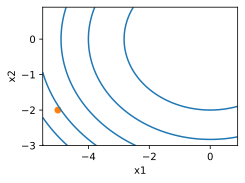

In [7]:
def f_2d(x1, x2): # 目标函数
    return x1 ** 2 + 2 * x2 ** 2
def f_2d_grad(x1, x2): # 目标函数的梯度
    return (2 * x1, 4 * x2)
def gd_2d(x1, x2, s1, s2, f_grad):
    g1, g2 = f_grad(x1, x2)
    return (x1 - eta * g1, x2 - eta * g2, 0, 0)
eta = 0.1
show_trace_2d(f_2d, train_2d(gd_2d, f_grad=f_2d_grad))